In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Dataset
df = pd.read_json("replace_positive_i.json", lines=True)
df.head()

,created_at,screen_name,text
0,2020-01-26 15:39:59+00:00,gogoyout,"https://t.co/BWFp76JUC4 Some 5,000 cruise pass..."
1,2020-01-27 16:11:47+00:00,removalman123,Las Vegas gambles on new slogan; cruise lines ...
2,2020-01-27 16:22:45+00:00,jackhough,"Based on China exposure for @RoyalCaribbean, U..."
3,2020-01-27 16:30:33+00:00,leisurenewswire,Rampant Spread of Coronavirus Leads to More Ev...
4,2020-01-27 16:30:33+00:00,LeisurePRnews,Rampant Spread of Coronavirus Leads to More Ev...


In [4]:
# Convert to list
data = df.text.values.tolist()

# Remove URL links
data = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove &amp
data = [re.sub("amp", "", sent) for sent in data]

print(data[:1])

[' Some 5,000 cruise passengers and 1,200 crew screened for coronavirus, 148 isolated ']


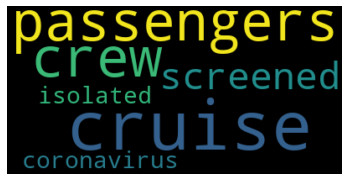

In [5]:
# Start with one tweet:
text = data[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

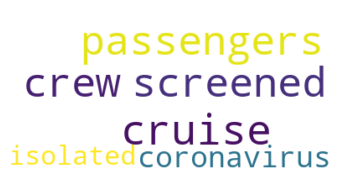

In [6]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
text = " ".join(review for review in data)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 18307849 words in the combination of all tweets.


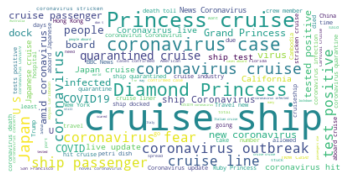

In [11]:
# pre-processing the text a little bit
text = text.replace("today", "petri dish")
text = text.replace("YouTube", "scared")
text = text.replace("test infected", "test positive")
text = text.replace("tested infected", "tested positive")
text = text.replace("tests infected", "tests positive")
text = text.replace("crisi", "crisis")

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["coronaviru", "viru", "live update", "via", "now", "will", "know", "day", "feb", "didn't", "travelnews", "don't", "traveltip", "don t", "even", "one"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
cruise_mask = np.array(Image.open("ship2.png"))
cruise_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
cruise_mask[cruise_mask == 0] = 255
#cruise_mask[cruise_mask == 76] = 255
#cruise_mask[cruise_mask == 105] = 255
#cruise_mask[cruise_mask == 113] = 255
#cruise_mask[cruise_mask == 220] = 255
#cruise_mask[cruise_mask == 212] = 255
#cruise_mask[cruise_mask == 216] = 255
#cruise_mask[cruise_mask == 225] = 255
#cruise_mask[cruise_mask == 227] = 255
#cruise_mask[cruise_mask == 234] = 255
#cruise_mask[cruise_mask == 119] = 255
#cruise_mask[cruise_mask == 168] = 255
#cruise_mask[cruise_mask == 201] = 255
cruise_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

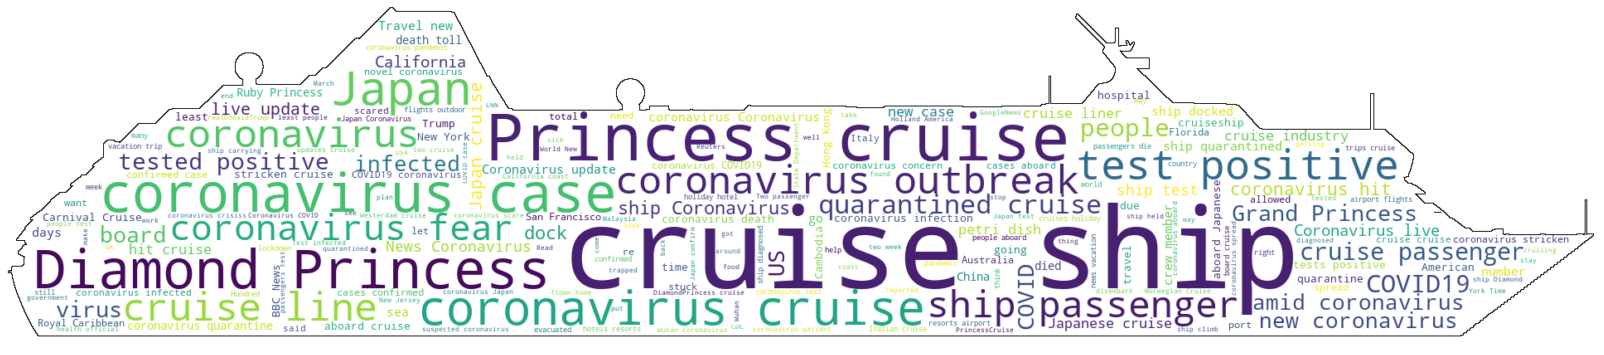

In [12]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=500, mask=cruise_mask,
               stopwords=stopwords, contour_width=0.5, contour_color='black', random_state=42, min_font_size=7, min_word_length=2)



# Generate a wordcloud
wc.generate(text)

# store to file
#wc.to_file("wordcruise.png")

# show
plt.figure(figsize=[28.5,20.5])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# store to file
wc.to_file("100cruise.png")

In [13]:
# store to file
wc.to_file("100cruise.eps")